# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Dataset Preparation

In [1]:
!wget -qq https://cdn.iiith.talentsprint.com/aiml/mvsr/Cat_Dog_data.zip
!unzip -qq Cat_Dog_data.zip

In [8]:
import torch, torchvision
from torchvision import datasets, transforms, models

In [9]:
transform = transforms.Compose([transforms.Resize((224, 224)),transforms.ToTensor(),])

# Prepare the train and test data
data_dir = '/content/Cat_Dog_data'
trainset = datasets.ImageFolder(data_dir + '/train', transform=transform)
testset = datasets.ImageFolder(data_dir + '/test', transform=transform)

In [10]:
dataset_sizes = {'Train': len(trainset), 'Test': len(testset)}
dataset_sizes

{'Test': 8, 'Train': 1817}

In [11]:
label_name = trainset.class_to_idx  # To get class names  trainset.classes
label_name

{'cat': 0, 'dog': 1}

In [12]:
# Load the data. utils.dataloader. Itis a package for loading the dataset 
train_loader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=100)
test_loader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=100)

In [13]:
for batch in iter(train_loader):
  print(batch[0].shape, batch[1].shape)

torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([100, 3, 224, 224]) torch.Size([100])
torch.Size([17, 3, 224, 224]) torch.Size([17])


In [18]:
# Get the images and the labels
current_Images, current_labels = next(iter(train_loader))

### Plotting the sample images

In [19]:
current_Images[10].shape

torch.Size([3, 224, 224])

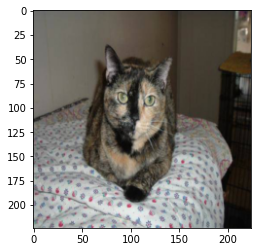

In [20]:
import matplotlib.pyplot as plt
plt.imshow(current_Images[10].permute(1,2,0))

In [21]:
# The label of the current image
current_labels[10]

tensor(0)

## AlexNet


AlexNet was the first convolutional network built for image classification

1.      AlexNet architecture consists of 5 convolutional layers, 3 max-pooling layers, 2 normalization layers, 2 fully connected layers, and 1 softmax layer. 

2.      Each convolutional layer consists of convolutional filters and a nonlinear activation function ReLU. 

3.      The pooling layers are used to perform max pooling. 

4.      Input size is fixed due to the presence of fully connected layers.

5.      The input size is mentioned at most of the places as 224x224x3 but due to some padding which happens it works out to be 227x227x3 

6.      AlexNet overall has 60 million parameters.

In [22]:
model_alexnet = models.alexnet(pretrained = True) # Architecture and weights are downloaded

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [23]:
print(model_alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [24]:
import torch
from torch import nn

in_ftr = model_alexnet.classifier[4].out_features
model_alexnet.classifier[6] = nn.Linear(in_ftr, 2)
model_alexnet


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [26]:
from torchsummary import summary
model_alexnet.to(device)
summary(model_alexnet, (3, 224,224)) #Trainable parameters are not frozen

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

### Train the model using AlexNet

In [27]:
criterion = nn.CrossEntropyLoss()

from torch import optim
#Optimizer(SGD)
optimizer = optim.SGD(model_alexnet.parameters(), lr=0.001)

In [28]:
# No of Epochs
epoch = 5

# Keeping the network in train mode
model_alexnet.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_loader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Passing the data to the model (Forward Pass)
      outputs = model_alexnet(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Zero the parameter gradients
      optimizer.zero_grad()
      
      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1) #_, => stores all the index of the maximum output
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(trainset))
    train_accuracy.append(100 * correct/len(trainset))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss:0.005826 Train Accuracy: 70.56 
epoch: 2, Train Loss:0.004025 Train Accuracy: 83.76 
epoch: 3, Train Loss:0.003516 Train Accuracy: 85.53 
epoch: 4, Train Loss:0.002935 Train Accuracy: 87.78 
epoch: 5, Train Loss:0.002649 Train Accuracy: 89.43 


### Test the Model Performance

In [29]:
model_alexnet.eval() 

image = current_Images[10]

# Add an extra batch dimension since pytorch treats all images as batches
output = model_alexnet(image.unsqueeze(0).to(device))

_, predicted = torch.max(output, 1)

trainset.classes[predicted.item()], predicted


('cat', tensor([0], device='cuda:0'))

In [30]:
# Keeping the network in evaluation mode 
model_alexnet.eval()  

Test_accuracy = 0
predictions, test_images = [], []
# Iterate through all the batches in each epoch
for images,labels in test_loader:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass 
    outputs = model_alexnet(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()
    test_images.extend(images.cpu())
    predictions.extend(predicted.cpu())

Accuracy = Test_accuracy / len(testset)
print("Accuracy of Test Data is", Accuracy)


Accuracy of Test Data is 1.0


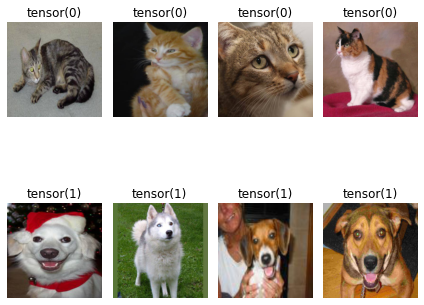

In [31]:
fig, axes = plt.subplots(2, 4, figsize = (6,6))
axes = axes.reshape(-1)
import numpy as np
for i in np.arange(0, len(test_images)):
    axes[i].imshow(test_images[i].permute(1, 2, 0))
    axes[i].set_title(predictions[i])
    axes[i].axis('off')

plt.tight_layout()

## VGG16

In [32]:
# Load the pretrained model
model_vgg16 = models.vgg16(pretrained=True)
print(model_vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth



VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

In [33]:
# Freezing all weights
for param in model_vgg16.parameters():
    param.requires_grad = False

In [34]:
# Change last 2 layers
model_vgg16.classifier[3] = nn.Linear(4096, 1048)
in_ftr = model_vgg16.classifier[3].out_features
model_vgg16.classifier[6] = nn.Linear(in_ftr, 2)
model_vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [38]:
model_vgg16.to(device)
summary(model_vgg16, (3, 224,224)) # Last layer parameters not frozen

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [39]:
# To update parameters of the last layers only


optimizer1 = optim.SGD([
                {'params': model_vgg16.classifier[4].parameters()},
                {'params': model_vgg16.classifier[6].parameters(), 'lr': 1e-2}
            ], lr=1e-2)



In [40]:
# No of Epochs
epoch = 5

# Keeping the network in train mode
model_vgg16.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_loader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Passing the data to the model (Forward Pass)
      outputs = model_vgg16(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Zero the parameter gradients
      optimizer1.zero_grad()
      
      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer1.step() updates the weights accordingly
      optimizer1.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1) #_, => stores all the index of the maximum output
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(trainset))
    train_accuracy.append(100 * correct/len(trainset))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss:0.006149 Train Accuracy: 71.11 
epoch: 2, Train Loss:0.004740 Train Accuracy: 84.04 
epoch: 3, Train Loss:0.004085 Train Accuracy: 86.85 
epoch: 4, Train Loss:0.003705 Train Accuracy: 88.00 
epoch: 5, Train Loss:0.003358 Train Accuracy: 89.65 


### Test the Model Performance

In [41]:
model_vgg16.eval() 

image = current_Images[10]

# Add an extra batch dimension since pytorch treats all images as batches
output = model_vgg16(image.unsqueeze(0).to(device))

_, predicted = torch.max(output, 1)

trainset.classes[predicted.item()], predicted


('cat', tensor([0], device='cuda:0'))

In [42]:
# Keeping the network in evaluation mode 
model_vgg16.eval()  

Test_accuracy = 0
predictions, test_images1 = [], []
# Iterate through all the batches in each epoch
for images,labels in test_loader:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass 
    outputs = model_vgg16(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()
    test_images1.extend(images.cpu())
    predictions.extend(predicted.cpu())

Accuracy = Test_accuracy / len(testset)
print("Accuracy of Test Data is", Accuracy)


Accuracy of Test Data is 0.875


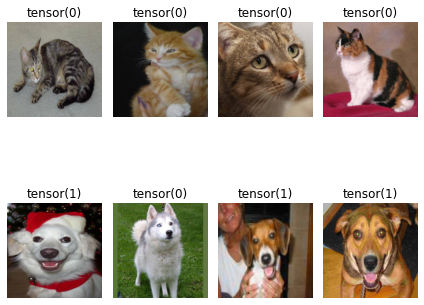

In [43]:
fig, axes = plt.subplots(2, 4, figsize = (6,6))
axes = axes.reshape(-1)
import numpy as np
for i in np.arange(0, len(test_images1)):
    axes[i].imshow(test_images1[i].permute(1, 2, 0))
    axes[i].set_title(predictions[i])
    axes[i].axis('off')

plt.tight_layout()